In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
google_stock = yf.download("GOOG", start = "2022-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [4]:
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000
2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000
2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000
2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000
2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000


## Daily Return Calculation and Visualization

#### Change of stock price over a day

In [5]:
google_stock["Daily_Return"] = google_stock["Adj Close"].pct_change()
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000,NaN
2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000,-0.004536
2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000,-0.046830
2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000,-0.000745
2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000,-0.003973


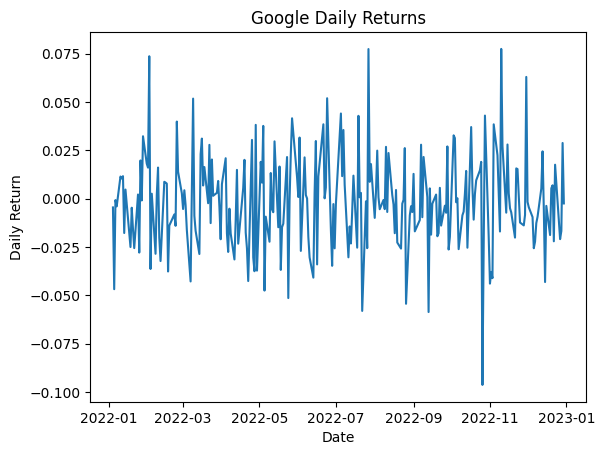

In [6]:
plt.plot(google_stock["Daily_Return"])
plt.title("Google Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

## Moving Average Calculation & Visualization

In [7]:
google_stock["50_MA"] = google_stock["Adj Close"].rolling(window = 50).mean()

In [8]:
google_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA
Date,,,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000,0.017562,95.1986
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900,-0.020933,95.0136
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600,-0.016718,94.7272
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700,0.028799,94.4784
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,-0.002473,94.2472


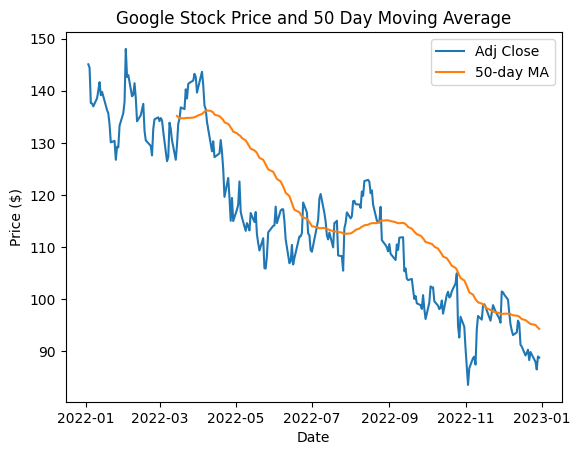

In [9]:
plt.plot(google_stock["Adj Close"], label = "Adj Close")
plt.plot(google_stock["50_MA"], label = "50-day MA")
plt.title("Google Stock Price and 50 Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

## Volatility Calculation

##### The higher the number, more volatile the stock

In [10]:
volatility = google_stock["Daily_Return"].std()
print(f"Volatility : {volatility}")


Volatility : 0.02447030189078784


## Sharpe Ratio Calculation

##### Measures performance of investment compared to a risk-free asset and higher sharpe ratio means better risk-adjusts return

In [11]:
risk_free_rate = 0.01 
annual_return = (google_stock["Daily_Return"].mean()+1) ** 252 -1
annual_volatility = google_stock["Daily_Return"].std() * np.sqrt(252)
sharpe_ratio = (annual_return-risk_free_rate) / annual_volatility
print("Sharpe Ratio:",sharpe_ratio)

Sharpe Ratio: -0.9090965948708514


## Beta Calculation

#### Measures stocks volatility in relation to the market, indicates that stock moves with the market

In [12]:
sp500 = yf.download("^GSPC", "2022-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [13]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [14]:
sp500["Daily_Return_SP500"] = sp500["Adj Close"].pct_change()
sp500

,Open,High,Low,Close,Adj Close,Volume,Daily_Return_SP500
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,0.005868
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,-0.004050
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,-0.012021


In [15]:
joined_data = pd.concat([google_stock["Daily_Return"], sp500["Daily_Return_SP500"]], axis= 1).dropna()

In [16]:
joined_data.head()

,Daily_Return,Daily_Return_SP500
Date,,
2022-01-04,-0.004536,-0.000630
2022-01-05,-0.046830,-0.019393
2022-01-06,-0.000745,-0.000964
2022-01-07,-0.003973,-0.004050
2022-01-10,0.011456,-0.001441


In [17]:
beta = joined_data.cov().iloc[0,1] / joined_data["Daily_Return_SP500"].var()

In [18]:
print(f"Beta:",beta)

# The better value gives an idea of how much risk the Google stock adds to a diversified portfolio

Beta: 1.3388977229229602


## Bollinger Bands Calculation and Visualization

#### Volatility indicator with 2 bands

In [19]:
google_stock["20_MA"] = google_stock["Adj Close"].rolling(window = 20).mean()

In [20]:
google_stock["Upper_Band"] = google_stock["20_MA"] + 2 * google_stock["Adj Close"].rolling(window = 20).std()

In [21]:
google_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_Band
Date,,,,,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000,0.017562,95.1986,94.423999,102.840908
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900,-0.020933,95.0136,94.007999,102.856280
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600,-0.016718,94.7272,93.558999,102.993281
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700,0.028799,94.4784,92.933999,101.806660
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,-0.002473,94.2472,92.306499,100.438079


In [22]:
google_stock["Lower_Band"] = google_stock["20_MA"] - 2 * google_stock["Adj Close"].rolling(window = 20).std()

In [23]:
google_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_Band,Lower_Band
Date,,,,,,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000,0.017562,95.1986,94.423999,102.840908,86.007091
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900,-0.020933,95.0136,94.007999,102.856280,85.159719
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600,-0.016718,94.7272,93.558999,102.993281,84.124717
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700,0.028799,94.4784,92.933999,101.806660,84.061338
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,-0.002473,94.2472,92.306499,100.438079,84.174920


In [24]:
google_stock["Adj Close"].rolling(window = 20).std()

Date
2022-01-03         NaN
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
                ...   
2022-12-23    4.208454
2022-12-27    4.424140
2022-12-28    4.717141
2022-12-29    4.436330
2022-12-30    4.065790
Name: Adj Close, Length: 251, dtype: float64

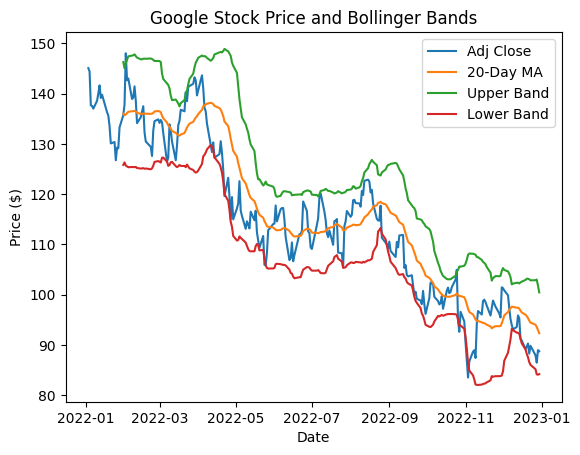

In [25]:
plt.plot(google_stock["Adj Close"], label = "Adj Close")
plt.plot(google_stock["20_MA"], label = "20-Day MA")
plt.plot(google_stock["Upper_Band"], label = "Upper Band")
plt.plot(google_stock["Lower_Band"], label = "Lower Band")
plt.title("Google Stock Price and Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

## Relative Strength Idnex (RSI) Calculation and VIsualization

#### Measures speed and change of price movements

In [26]:
delta = google_stock["Adj Close"].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window = 14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window = 14).mean()

In [27]:
rs = gain / loss

In [28]:
google_stock["RSI"] = 100 - (100/(1 + rs))

In [29]:
google_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_Band,Lower_Band,RSI
Date,,,,,,,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000,0.017562,95.1986,94.423999,102.840908,86.007091,25.956000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900,-0.020933,95.0136,94.007999,102.856280,85.159719,26.828050
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600,-0.016718,94.7272,93.558999,102.993281,84.124717,27.774916
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700,0.028799,94.4784,92.933999,101.806660,84.061338,38.003828
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,-0.002473,94.2472,92.306499,100.438079,84.174920,39.246776


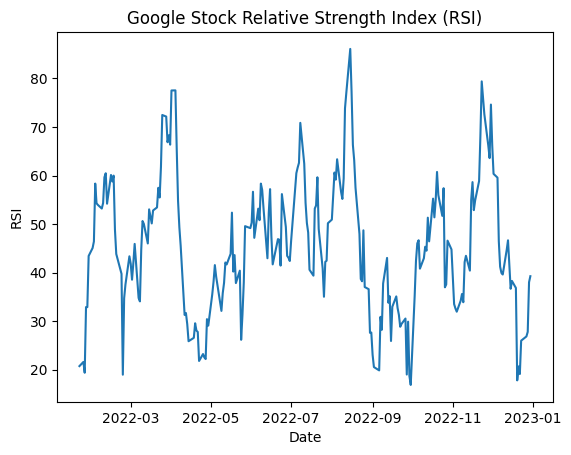

In [30]:
plt.plot(google_stock["RSI"])
plt.title("Google Stock Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.show()